# Visualisations

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import sys

sys.path.append('../hydra_tod/')
from simulation import TODSimulation, MultiTODSimulation
from analysis import intersect_with_indices, get_subset_indices, calculate_coverage_maps

292


In [2]:
import pickle
with open('tod_simulation_single.pkl', 'rb') as f:
    tod_sim = pickle.load(f)
# Load the simulation data from a pickle file
with open('multi_tod_simulation_data.pkl', 'rb') as f:
    multi_tod_sim = pickle.load(f)

## 1. Prepare the experimental setup

In [3]:
from simulation import eq_coordinates

In [4]:
nside = 64
# Get the timestream of beam centers (theta_c, phi_c) for each scan
eq_coords_setting, eq_coords_rising = eq_coordinates()

In [5]:
full_bool_map = multi_tod_sim.full_bool_map
pixel_indices = multi_tod_sim.pixel_indices
bool_map_setting, bool_map_rising = multi_tod_sim.bool_map_setting, multi_tod_sim.bool_map_rising
integrated_beam = multi_tod_sim.integrated_beam 

Tsky_operator_setting = multi_tod_sim.Tsky_operator_setting
Tsky_operator_rising = multi_tod_sim.Tsky_operator_rising


In [6]:
def sky_vector(pix_indices, freq, Nside=64, sky_model=None):
    if sky_model is None:
        from pygdsm import GlobalSkyModel
        gsm = GlobalSkyModel()
        skymap = gsm.generate(freq)
    else:
        skymap = sky_model(freq)
    skymap = hp.ud_grade(skymap, nside_out=Nside)
    ptsrc = np.load("gleam_nside512_K_allsky_408MHz.npy")
    ptsrc_map = hp.ud_grade(ptsrc, nside_out=Nside) * (freq / 408)**(-2.3)
    skymap = skymap + ptsrc_map
    return skymap[pix_indices]

In [7]:
pixel_indices_setting = np.where(multi_tod_sim.bool_map_setting)[0]
pixel_indices_rising = np.where(multi_tod_sim.bool_map_rising)[0]
common_pix, _, _ = intersect_with_indices(pixel_indices_setting, pixel_indices_rising)
print(len(common_pix))

inds_common_pix_in_setting = get_subset_indices(pixel_indices_setting, common_pix)
inds_common_pix_in_db = get_subset_indices(pixel_indices, common_pix)



sky_params_setting = sky_vector(pixel_indices_setting, 750, Nside=nside, sky_model=None)
sky_params_rising = sky_vector(pixel_indices_rising, 750, Nside=nside, sky_model=None)

calibration_indices = tod_sim.calibration_1_indice
pixel_indices_setting_1 = pixel_indices_setting[calibration_indices]

calibration_5_indices = tod_sim.calibration_5_indices
pixel_indices_setting_5 = pixel_indices_setting[calibration_5_indices]


292


In [8]:
sky_params = sky_vector(pixel_indices, 750, Nside=nside, sky_model=None)
print("Number of pixels: ", len(pixel_indices))

calibration_db_indices = multi_tod_sim.calibration_1_index
pixel_indices_db_1 = pixel_indices[calibration_db_indices]

calibration_db_5indices = multi_tod_sim.calibration_5_indices
pixel_indices_db_5 = pixel_indices[calibration_db_5indices]

Number of pixels:  473


## 2. Visualise the samples

In [9]:
alpha = 2.0
logf0=-4.874571109426952
gain_params_setting = np.array([6.31194264, 0.42038942, 0.264222, 0.05578821])
gain_params_rising = np.array([6.84507868, 0.14156859, 0.7441104, 0.77863955])
log_gain_rising_coeffs = np.array([1.92145688, 0.01696235, 0.10526728, 0.10983915])
log_gain_setting_coeffs = np.array([1.84155116, 0.065492, 0.03998476, 0.00717087])
rec_params = np.array([15.0, 12.6, 0.5, 0.5, 0.5])

In [10]:
import numpy as np

In [11]:
true_others_1 = np.hstack((gain_params_setting, rec_params, [logf0, alpha]))
true_others_2 = np.hstack((gain_params_setting, gain_params_rising, rec_params, rec_params, [logf0, alpha], [logf0, alpha]))
true_others_2_log = np.hstack((log_gain_setting_coeffs, log_gain_rising_coeffs, rec_params, rec_params, [logf0, alpha], [logf0, alpha]))

### 2.1 Histograms

In [12]:
from visualisation import plot_residual_histogram, view_patch_map, gnomview_patch

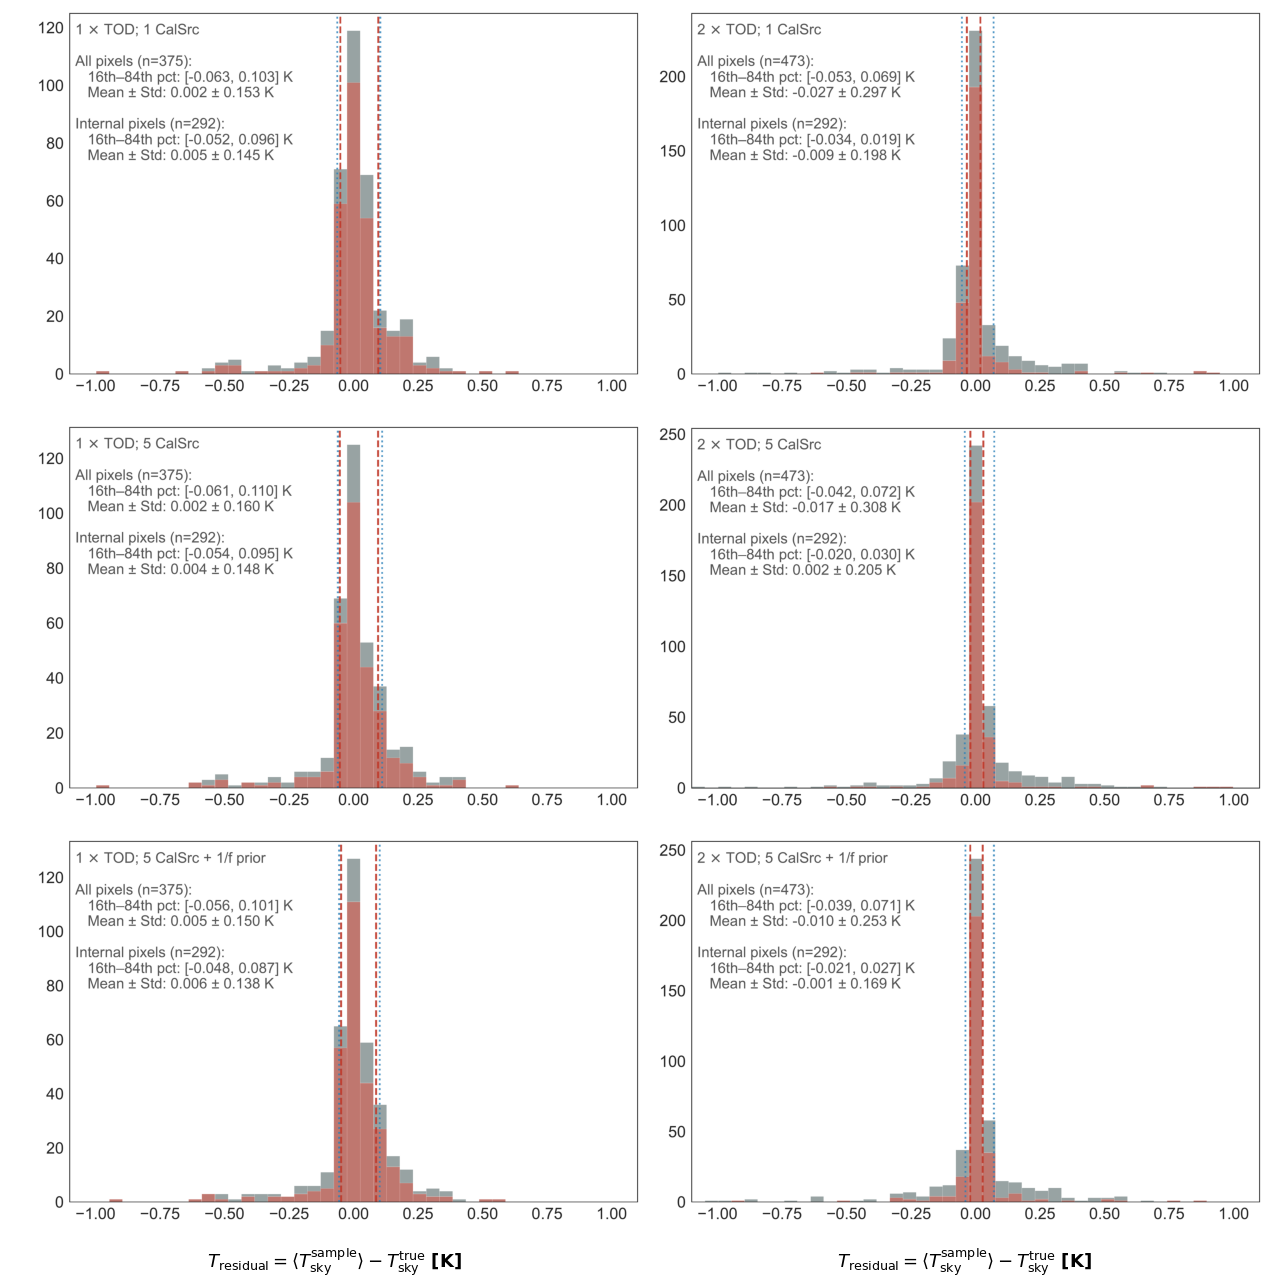

In [4]:
from visualisation import combine_pdfs_to_panels

# Example usage with common labels

residual_pdfs = [
    "figures/GS1_mean_res.pdf",
    "figures/GS1_linear_mean_res.pdf", 
    "figures/GS5_mean_res.pdf",
    "figures/GS5_linear_mean_res.pdf",
    "figures/GSF5_mean_res.pdf",
    "figures/GSF5_linear_mean_res.pdf"
]

# panel_titles = [
#     "1×TOD; 1 CalSrc",
#     "2×TOD; 1 CalSrc",
#     "1×TOD; 5 CalSrc", 
#     "2×TOD; 5 CalSrc",
#     "1×TOD; 5 CalSrc + 1/f prior",
#     "2×TOD; 5 CalSrc + 1/f prior"
# ]

panel_titles = None

combine_pdfs_to_panels(
    pdf_files=residual_pdfs,
    output_file="figures/new/combined_residual_histograms.pdf",
    rows=3, cols=2,
    titles=None,
    common_xlabel=r'$T_{\mathrm{residual}} = \langle T^{\mathrm{sample}}_{\mathrm{sky}} \rangle - T_{\mathrm{sky}}^{\mathrm{true}}$ [K]',
    common_ylabel=" ",
    figsize=(14, 14),
    add_panel_labels=True,  # Enable panel labels
    panel_label_fontsize=13,
    ay=0.9, by=0.1, ly=0.01,
    ax=0.9, bx=0.1, lx=0.02,
)

### 2.2 Maps

## Generate posterior median as sky estimation

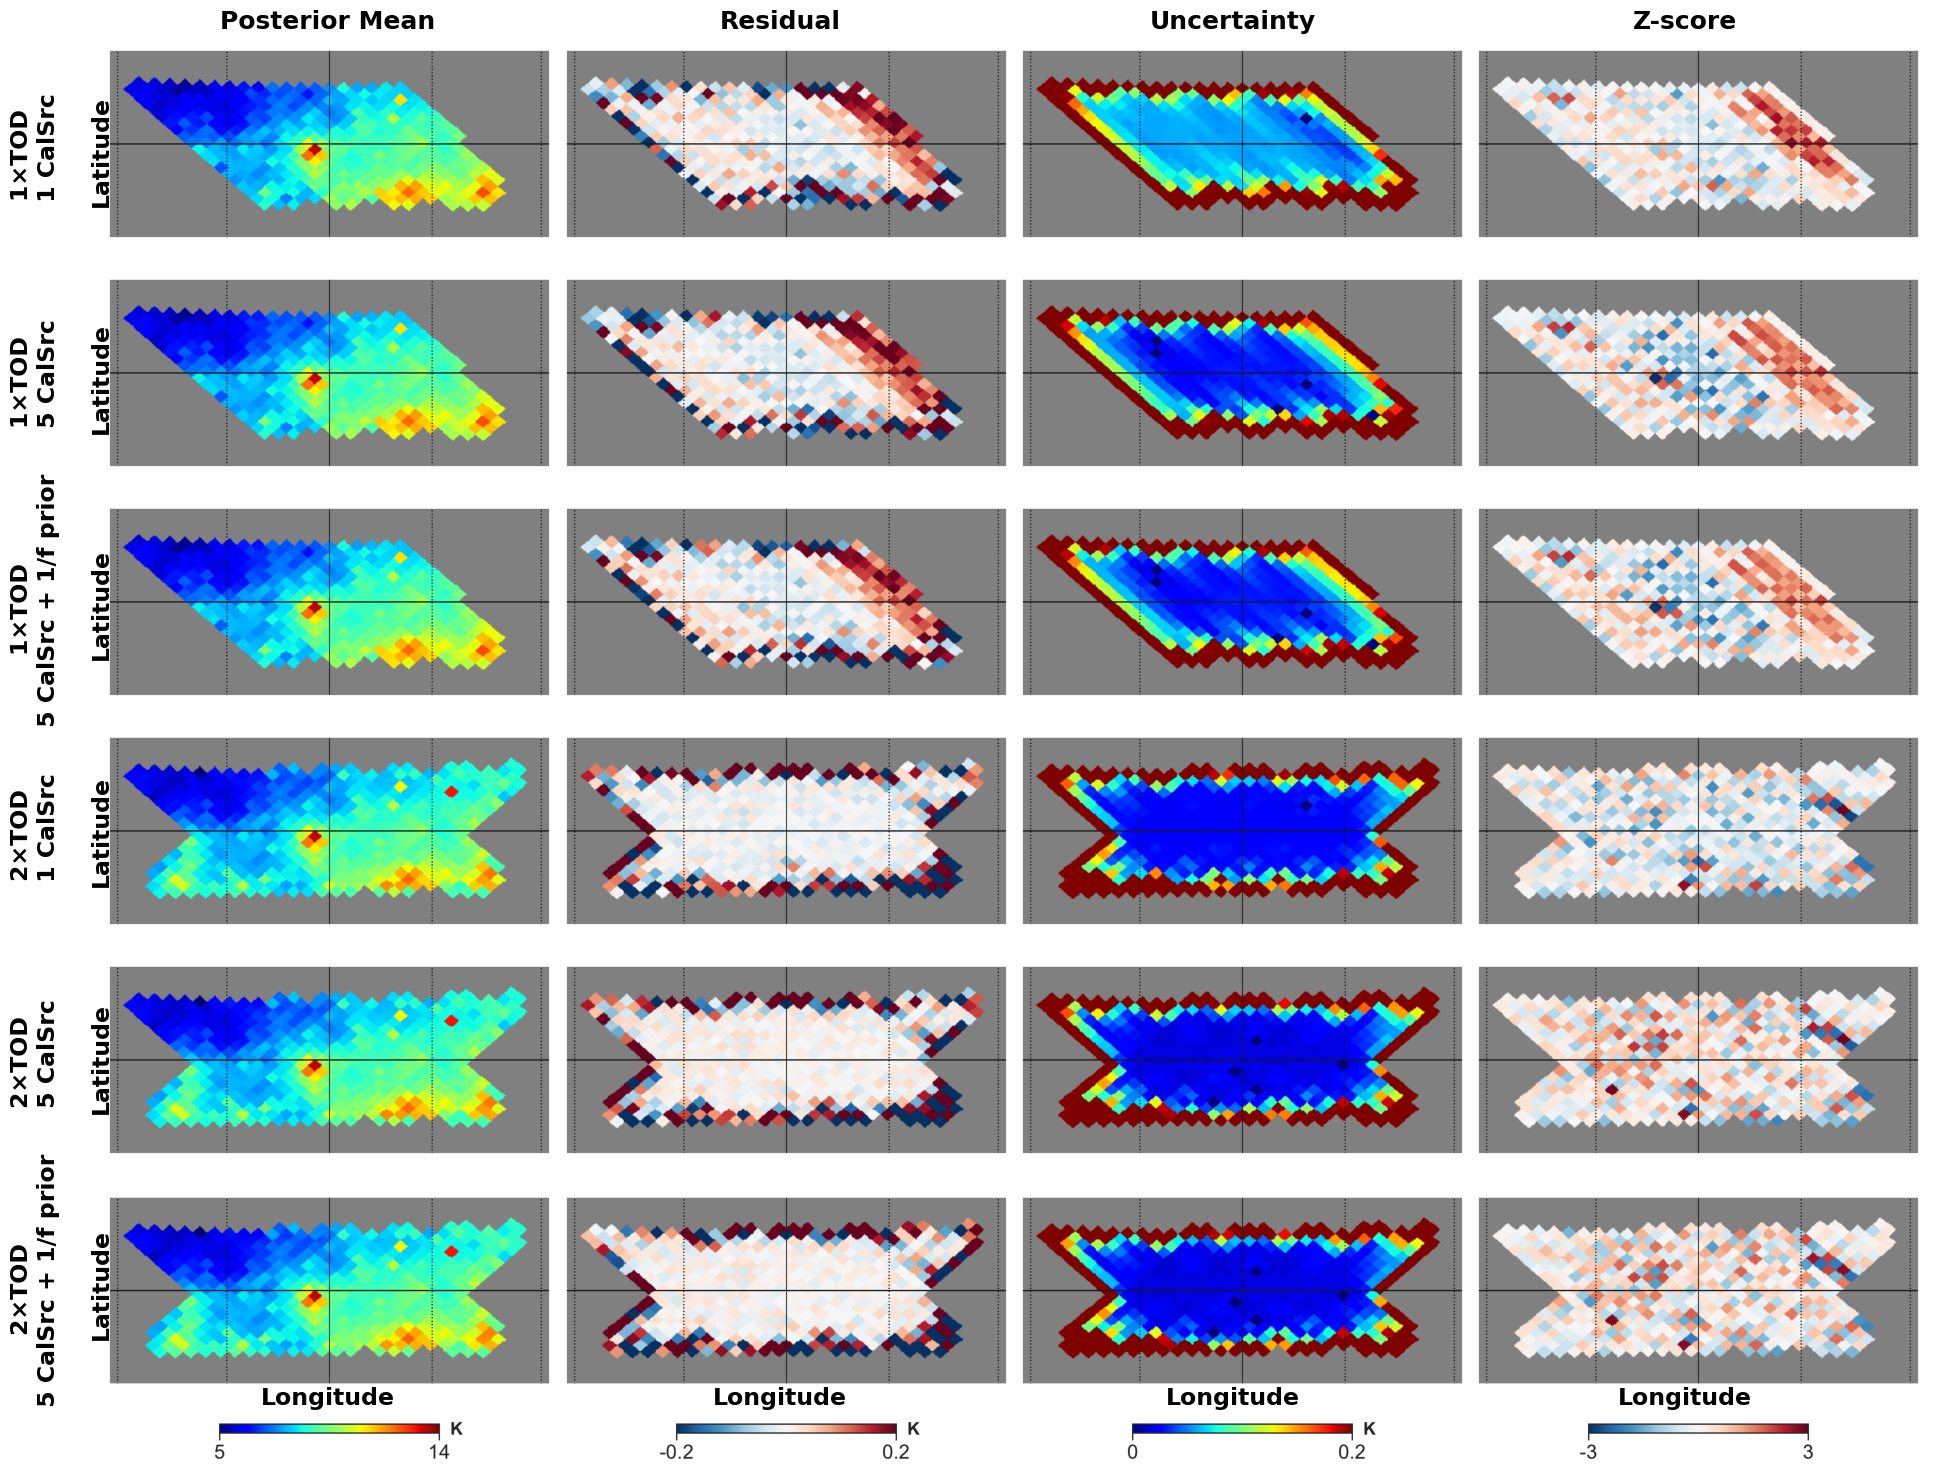

In [16]:
# Example usage with common labels

map_pdfs = [
    "figures/new/GS1_mean_map.pdf",
    "figures/new/GS1_err_map.pdf",
    "figures/new/GS1_std_map.pdf",
    "figures/new/GS1_zscore_map.pdf",
    "figures/new/GS5_mean_map.pdf",
    "figures/new/GS5_err_map.pdf",
    "figures/new/GS5_std_map.pdf",
    "figures/new/GS5_zscore_map.pdf",
    "figures/new/GSF5_mean_map.pdf",
    "figures/new/GSF5_err_map.pdf",
    "figures/new/GSF5_std_map.pdf",
    "figures/new/GSF5_zscore_map.pdf",
    "figures/new/GS1_db_mean_map.pdf",
    "figures/new/GS1_db_err_map.pdf",
    "figures/new/GS1_db_std_map.pdf",
    "figures/new/GS1_db_zscore_map.pdf",
    "figures/new/GS5_db_mean_map.pdf",
    "figures/new/GS5_db_err_map.pdf",
    "figures/new/GS5_db_std_map.pdf",
    "figures/new/GS5_db_zscore_map.pdf",
    "figures/new/GSF5_db_mean_map.pdf",
    "figures/new/GSF5_db_err_map.pdf",
    "figures/new/GSF5_db_std_map.pdf",
    "figures/new/GSF5_db_zscore_map.pdf",
    # "figures/new/hp_wiener_estimation.pdf",
    # "figures/new/hp_wiener_residual.pdf",
    # "figures/hp_wiener_uncertainty.pdf",
    # "figures/hp_wiener_zscore.pdf"
]



panel_titles = None


import os
def combine_pdfs_to_panels_v2(pdf_files, rows, cols, figsize=(16, 12), 
                          output_file=None, 
                          titles=None, suptitle=None, dpi=300, 
                          col_labels=None, row_labels=None, 
                          add_panel_labels=True, panel_label_fontsize=16,
                          ya=1., yb=0., yl=0.0,
                          xa=1., xb=0., xl=0.0,
                          map_names = ['Posterior Mean', 'Residual', 'Uncertainty', 'Z-score']):
    """
    Combine multiple PDF files into a single PDF with panels arranged in rows and columns.
    
    Parameters:
    -----------
    pdf_files : list of str
        List of PDF file paths to combine
    output_file : str
        Output PDF file path
    rows : int
        Number of rows in the panel layout
    cols : int
        Number of columns in the panel layout
    figsize : tuple
        Figure size (width, height) in inches
    titles : list of str, optional
        List of titles for each panel
    suptitle : str, optional
        Main title for the entire figure
    dpi : int
        DPI for the output PDF
    common_xlabel : str, optional
        Common x-axis label for all panels
    common_ylabel : str, optional
        Common y-axis label for all panels
    label_fontsize : int
        Font size for common axis labels
    add_panel_labels : bool
        Whether to add panel labels (a, b, c, etc.)
    panel_label_fontsize : int
        Font size for panel labels
    """
    
    # Verify we have the right number of files
    expected_panels = rows * cols
    if len(pdf_files) != expected_panels:
        raise ValueError(f"Expected {expected_panels} PDF files for {rows}x{cols} layout, got {len(pdf_files)}")
    
    # Convert PDFs to images first (using pdf2image library)
    try:
        from pdf2image import convert_from_path
    except ImportError:
        raise ImportError("Please install pdf2image: pip install pdf2image")
    
    # Create the combined figure with adjustable height ratios
    fig = plt.figure(figsize=figsize)
    
    # Calculate height ratios based on image aspect ratios
    height_ratios = []
    for i in range(0, len(pdf_files), cols):
        row_images = pdf_files[i:i+cols]
        row_heights = []
        
        for pdf_file in row_images:
            try:
                images = convert_from_path(pdf_file, dpi=200, first_page=1, last_page=1)
                img_array = np.array(images[0])
                aspect_ratio = img_array.shape[0] / img_array.shape[1]  # height/width
                row_heights.append(aspect_ratio)
            except:
                row_heights.append(1.0)  # default aspect ratio
        
        # Use the maximum height in this row to ensure alignment
        height_ratios.append(max(row_heights))
    
    # Create subplots with custom height ratios
    gs = fig.add_gridspec(rows, cols, height_ratios=height_ratios, hspace=0., wspace=0.)
    axes = []
    for i in range(rows):
        for j in range(cols):
            ax = fig.add_subplot(gs[i, j])
            axes.append(ax)
    
    # Process each PDF file
    for i, pdf_file in enumerate(pdf_files):
        if not os.path.exists(pdf_file):
            print(f"Warning: File {pdf_file} not found, skipping...")
            continue
            
        # Convert PDF to image
        try:
            images = convert_from_path(pdf_file, dpi=200, first_page=1, last_page=1)
            img_array = np.array(images[0])
            
            # Display the image with aspect='equal' to maintain aspect ratio
            axes[i].imshow(img_array, aspect='equal')
            axes[i].axis('off')
            
            # Add title if provided
            if titles and i < len(titles) and titles[i]:
                axes[i].set_title(titles[i], fontsize=12, pad=10)
                
        except Exception as e:
            print(f"Error processing {pdf_file}: {e}")
            axes[i].text(0.5, 0.5, f"Error loading\n{os.path.basename(pdf_file)}", 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].axis('off')
    
    # Add main title if provided
    if suptitle:
        fig.suptitle(suptitle, fontsize=16, y=0.95)
    
    # Adjust layout to make room for common labels and panel labels
    plt.tight_layout()
    if suptitle:
        plt.subplots_adjust(top=0.9)
    
    # Adjust margins for labels
    left_margin = 0.05
    bottom_margin = 0.05

    # Extra space for panel labels
    if add_panel_labels:
        left_margin += 0.03  # Extra space for row labels
        bottom_margin += 0.03  # Extra space for column labels
    
    plt.subplots_adjust(left=left_margin, bottom=bottom_margin)
    


    # Add panel labels
    if add_panel_labels:
        
        # Row labels  
        for i, label in enumerate(row_labels):
            y_pos = ya * (1 - (i + 0.5) / rows) + yb # Center vertically for each row
            fig.text(left_margin - yl, y_pos, f'{label}', 
                    ha='center', va='center', 
                    fontsize=panel_label_fontsize, weight='bold', rotation='vertical')
        

        
        for j, label in enumerate(col_labels):
            x_pos = xa * ((j + 0.5) / cols) + xb  # Use ax_param instead of ax
            fig.text(x_pos, bottom_margin - xl, f'{label}', 
                    ha='center', va='center', 
                    fontsize=panel_label_fontsize, weight='bold')
            fig.text(x_pos, 1 - 0.01, map_names[j], 
                    ha='center', va='center', 
                    fontsize=panel_label_fontsize + 1, weight='bold')
    
    # Save the combined figure
    if output_file is not None:
        plt.savefig(output_file, dpi=dpi, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    pass


panel_titles = [
    "1×TOD \n 1 CalSrc" + "\n\n" + "Latitude",
    "1×TOD \n 5 CalSrc" + "\n\n" + "Latitude",
    "1×TOD \n 5 CalSrc + 1/f prior" + "\n\n" + "Latitude",
    "2×TOD \n 1 CalSrc" + "\n\n" + "Latitude",
    "2×TOD \n 5 CalSrc" + "\n\n" + "Latitude",
    "2×TOD \n 5 CalSrc + 1/f prior" + "\n\n" + "Latitude"
]

combine_pdfs_to_panels_v2(
    pdf_files=map_pdfs,
    output_file="figures/new/combined_maps.pdf",
    rows=6, cols=4,
    titles=None,
    col_labels=['Longitude']*4,
    row_labels=panel_titles,
    figsize=(20, 16),
    # add_panel_labels=True,  # Enable panel labels
    panel_label_fontsize=17,
    ya=0.85, yb=0.13, yl=0.02,
    xa=0.905, xb=0.08, xl=-0.05,
)

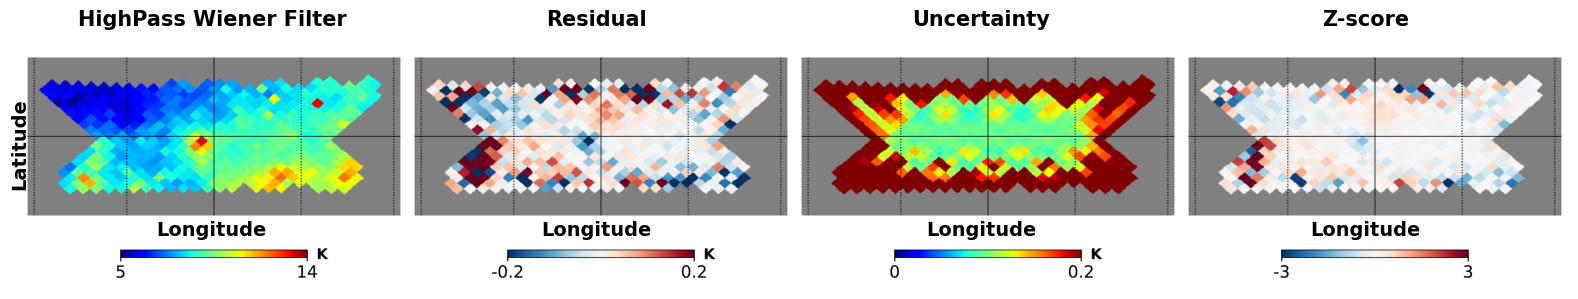

In [15]:
# Example usage with common labels

map_pdfs = [
    "figures/new/hp_wiener_estimation.pdf",
    "figures/new/hp_wiener_residual.pdf",
    "figures/new/hp_wiener_uncertainty.pdf",
    "figures/new/hp_wiener_zscore.pdf"
]



panel_titles = [
    "Latitude"
]

combine_pdfs_to_panels_v2(
    pdf_files=map_pdfs,
    output_file="figures/new/combined_wiener_maps.pdf",
    rows=1, cols=4,
    titles=None,
    # col_labels=['']*4,
    col_labels=['Longitude']*4,
    row_labels=panel_titles,
    figsize=(17, 3),
    # add_panel_labels=True,  # Enable panel labels
    panel_label_fontsize=14,
    ya=0.85, yb=0.15, yl=0.0,
    xa=0.905, xb=0.08, xl=-0.21,
    map_names = ['HighPass Wiener Filter', 'Residual', 'Uncertainty', 'Z-score']
)

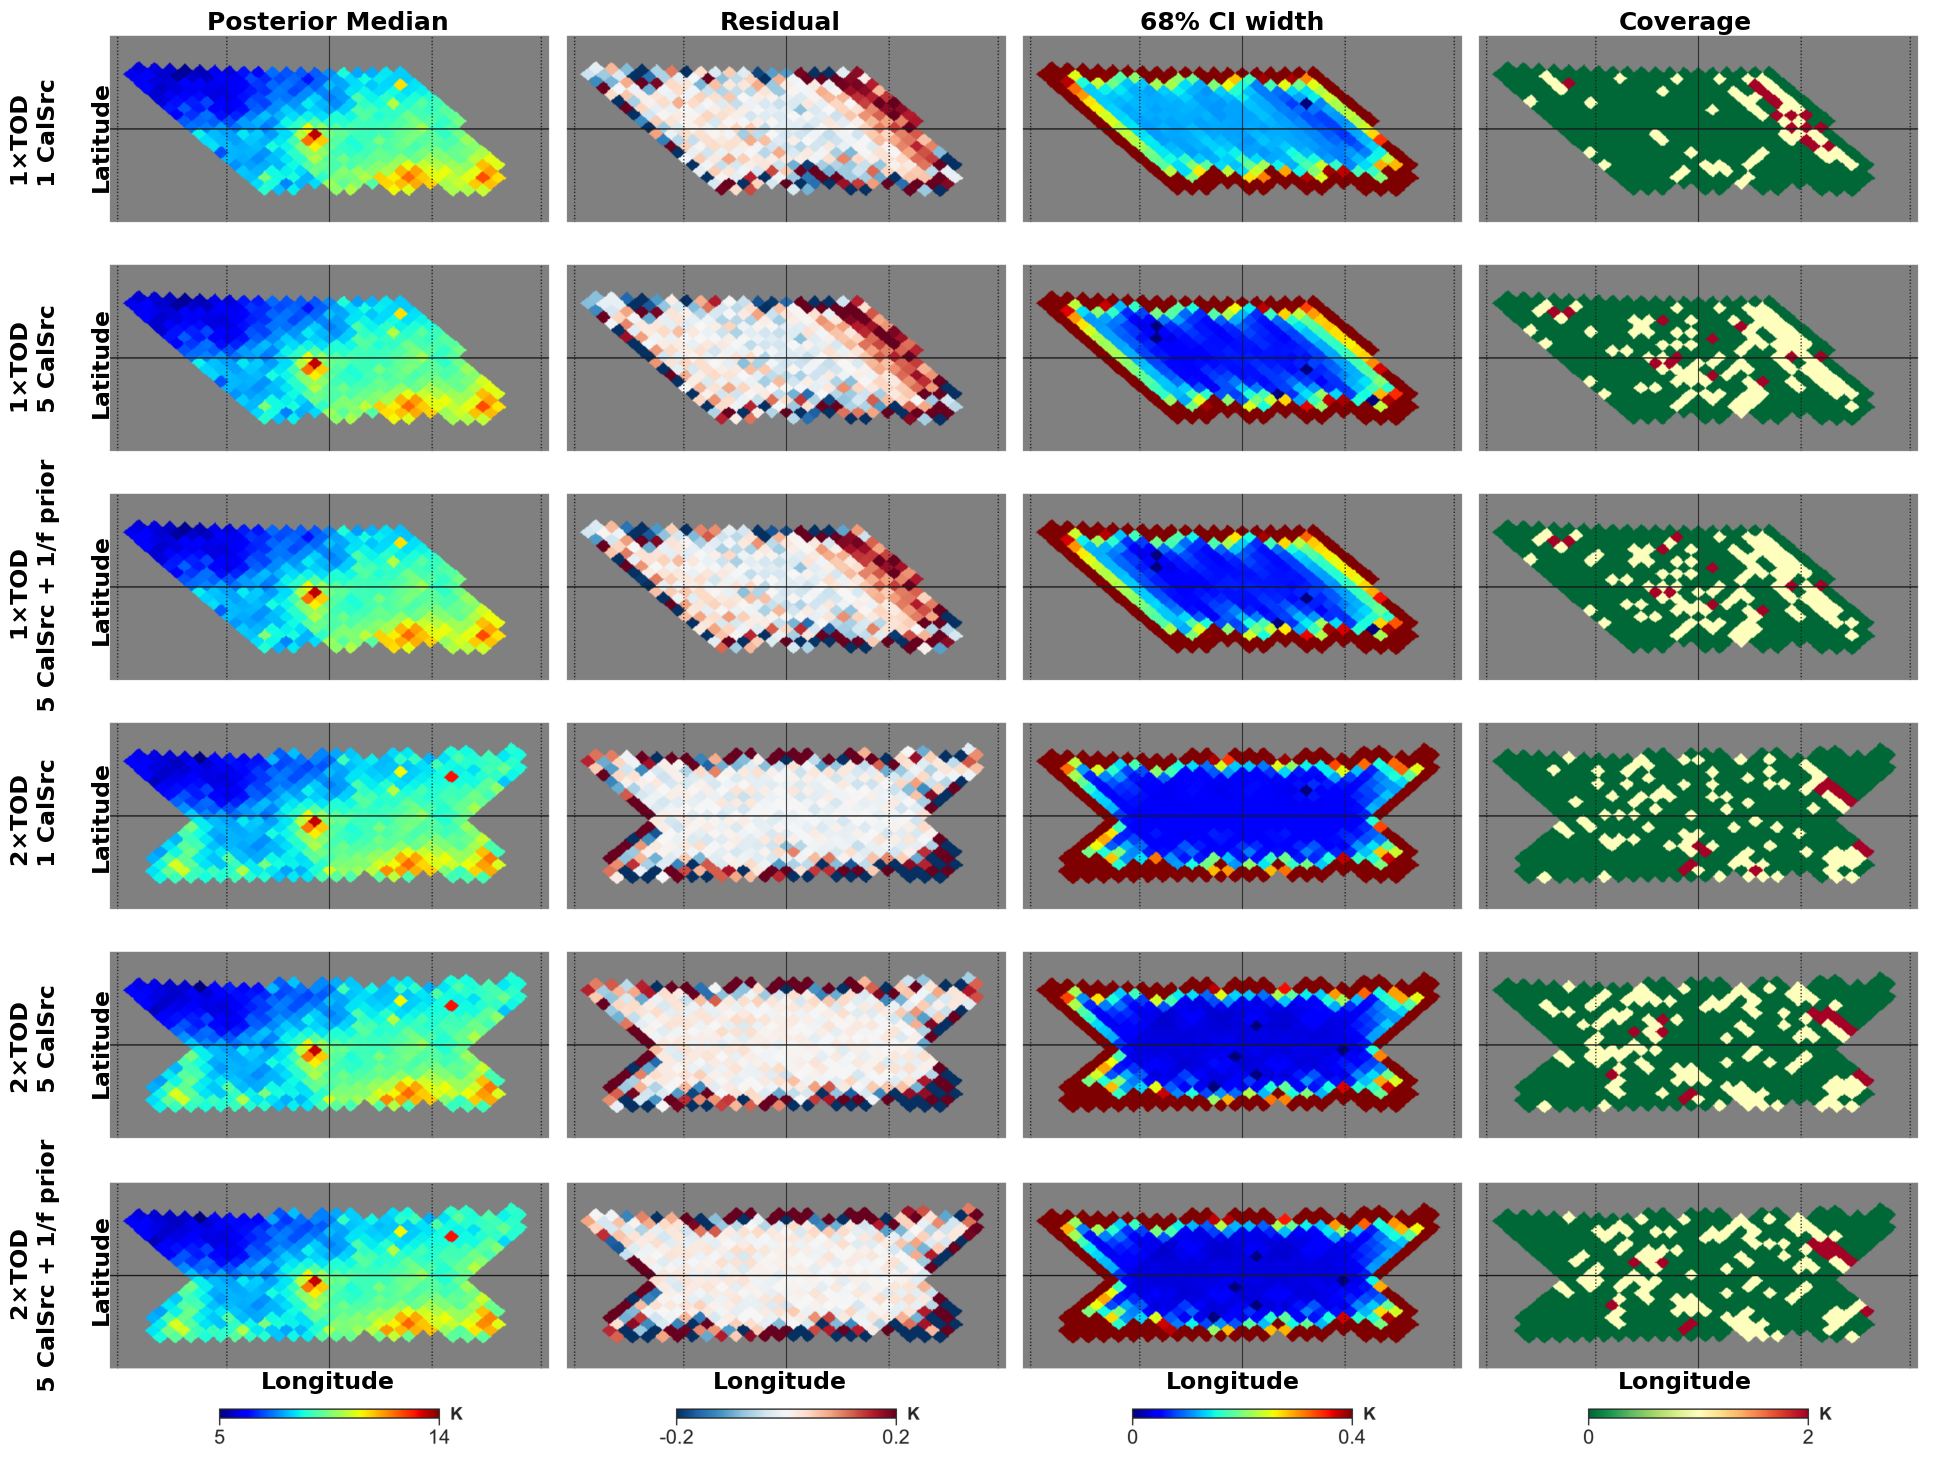

In [44]:

map_pdfs = [
    "figures/new/GS1_median_map.pdf",
    "figures/new/GS1_med_err_map.pdf",
    "figures/new/GS1_ci_map.pdf",
    "figures/new/GS1_coverage_map.pdf",
    "figures/new/GS5_median_map.pdf",
    "figures/new/GS5_med_err_map.pdf",
    "figures/new/GS5_ci_map.pdf",
    "figures/new/GS5_coverage_map.pdf",
    "figures/new/GSF5_median_map.pdf",
    "figures/new/GSF5_med_err_map.pdf",
    "figures/new/GSF5_ci_map.pdf",
    "figures/new/GSF5_coverage_map.pdf",
    "figures/new/GS1_db_median_map.pdf",
    "figures/new/GS1_db_med_err_map.pdf",
    "figures/new/GS1_db_ci_map.pdf",
    "figures/new/GS1_db_coverage_map.pdf",
    "figures/new/GS5_db_median_map.pdf",
    "figures/new/GS5_db_med_err_map.pdf",
    "figures/new/GS5_db_ci_map.pdf",
    "figures/new/GS5_db_coverage_map.pdf",
    "figures/new/GSF5_db_median_map.pdf",
    "figures/new/GSF5_db_med_err_map.pdf",
    "figures/new/GSF5_db_ci_map.pdf",
    "figures/new/GSF5_db_coverage_map.pdf"
]

panel_titles = [
    "1×TOD \n 1 CalSrc" + "\n\n" + "Latitude",
    "1×TOD \n 5 CalSrc" + "\n\n" + "Latitude",
    "1×TOD \n 5 CalSrc + 1/f prior" + "\n\n" + "Latitude",
    "2×TOD \n 1 CalSrc" + "\n\n" + "Latitude",
    "2×TOD \n 5 CalSrc" + "\n\n" + "Latitude",
    "2×TOD \n 5 CalSrc + 1/f prior" + "\n\n" + "Latitude"
]

combine_pdfs_to_panels_v2(
    pdf_files=map_pdfs,
    output_file="figures/new/combined_median_maps.pdf",
    rows=6, cols=4,
    titles=None,
    col_labels=['Longitude']*4,
    row_labels=panel_titles,
    figsize=(20, 16),
    # add_panel_labels=True,  # Enable panel labels
    panel_label_fontsize=17,
    ya=0.85, yb=0.13, yl=0.02,
    xa=0.905, xb=0.08, xl=-0.05,
    map_names = ['Posterior Median', 'Residual', '68% CI width', 'Coverage']
)

## Pixel study

In [14]:
GS1_dict.keys()

dict_keys(['mean', 'std', 'median', 'ci_68', 'coverage', 'zscore'])

In [ ]:
Tsys_samples = np.load("outputs/GS1/Tsys_samples_linearG.npy")
gain_samples = np.load("outputs/GS1/gain_samples_linearG.npy")
noise_samples = np.load("outputs/GS1/noise_samples_linearG.npy")

from simulation import TODSimulation, MultiTODSimulation

from analysis import explore_posterior_joint_Tsys

GS1_dict = explore_posterior_joint_Tsys(Tsys_samples, 
                             gain_samples, 
                             noise_samples, 
                             tod_sim.sky_params,
                             title_str= r'1 $\times$ TOD; 1 CalSrc',
                             save_path='figures/new/GS1',
                             two_x_TODs=False, 
                             warm_up=0, 
                             cbar=False
                             )

GS1_Tsky_coverage = GS1_dict['coverage']

# Get indices where GS1_Tsky_coverage equals 1
indices_of_twos = np.where(GS1_Tsky_coverage == 2)[0]

# Get indices where GS1_Tsky_coverage equals 1
indices_of_zeros = np.where(GS1_Tsky_coverage == 0)[0]

# Get the 5th occurrence (index 4, since Python is 0-indexed)
fifth_index = indices_of_twos[4]

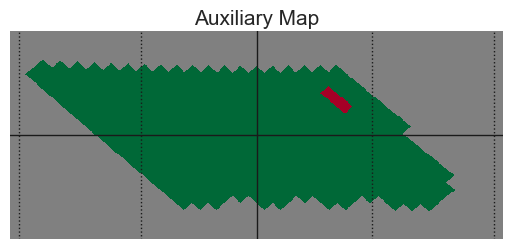

In [26]:
aux_map = np.zeros_like(GS1_Tsky_coverage)

# Set the 5th occurrence to 2
aux_map[indices_of_twos[2:5]] = 2

from analysis import lon_center, lat_center, res

gnomview_patch(aux_map, 
               pixel_indices_setting, 
               lon_center, 
               lat_center,
               res,
               0.0, 
               2.0,
               title="Auxiliary Map",
               cmap='RdYlGn_r',
               cbar=False,
               xtick=False,
               xlabel=None,
               ytick=False,
               ylabel=None,
               save_path=None
               )

In [ ]:
individual_pixel_samples = GS1_Tsys_samples[:, fifth_index]
individual_pixel_truth = sky_params_setting[fifth_index]

def plot_pixel_parameter_correlations_compact(pixel_samples, other_params, pixel_truth, 
                                             param_names=None, figsize=(16, 6), ft_size=14,
                                             save_path=None):
    """
    Compact correlation plot: marginal on top, all correlations in bottom row with shared y-axis
    
    Parameters:
    -----------
    pixel_samples : array-like, shape (N_samples,)
        MCMC samples for the individual pixel
    other_params : array-like, shape (N_samples, N_params)
        MCMC samples for other parameters
    pixel_truth : float
        True value of the pixel
    param_names : list of str, optional
        Names for the other parameters
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.stats import pearsonr, gaussian_kde
    from matplotlib.gridspec import GridSpec
    
    n_params = other_params.shape[1]
    
    # Default parameter names if not provided
    if param_names is None:
        param_names = [f'Param {i+1}' for i in range(n_params)]
    
    # Create figure with GridSpec for better control
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(2, n_params + 1, figure=fig, 
                  height_ratios=[1, 1], 
                  width_ratios=[1] * n_params + [0.05],  # Extra column for colorbar
                  hspace=0.4, wspace=0.1)
    
    # Top row: Marginal distribution (spans all columns except colorbar)
    ax_marginal = fig.add_subplot(gs[0, :-1])
    
    # Plot histogram with KDE
    n_bins = 50
    counts, bins, patches = ax_marginal.hist(pixel_samples, bins=n_bins, 
                                           density=True, alpha=0.7, 
                                           color='lightblue', edgecolor='navy', 
                                           linewidth=0.5)
    
    # Add KDE overlay
    kde = gaussian_kde(pixel_samples)
    x_kde = np.linspace(pixel_samples.min(), pixel_samples.max(), 200)
    y_kde = kde(x_kde)
    ax_marginal.plot(x_kde, y_kde, 'navy', linewidth=2.5, alpha=0.8)
    
    # Add vertical lines for statistics
    pixel_mean = np.mean(pixel_samples)
    pixel_std = np.std(pixel_samples)
    pixel_median = np.median(pixel_samples)
    
    ax_marginal.axvline(pixel_truth, color='red', linestyle='--', 
                       linewidth=2.5, label=f'True: {pixel_truth:.3f}K')
    ax_marginal.axvline(pixel_mean, color='green', linestyle='-', 
                       linewidth=2, alpha=0.8, label=f'Mean: {pixel_mean:.3f}K')
    ax_marginal.axvline(pixel_median, color='orange', linestyle=':', 
                       linewidth=2, alpha=0.8, label=f'Median: {pixel_median:.3f}K')

    ax_marginal.set_xlabel('Sky Temperature [K]', fontsize=ft_size)
    ax_marginal.set_ylabel('Density', fontsize=ft_size)
    ax_marginal.set_title(f'Marginal Distribution of the Selected Pixel', fontsize=ft_size)
    ax_marginal.legend(loc='upper right', fontsize=ft_size, framealpha=0.9)
    ax_marginal.grid(True, alpha=0.3)
    # tick
    ax_marginal.tick_params(axis='both', which='major', labelsize=ft_size)
    ax_marginal.tick_params(axis='both', which='minor', labelsize=ft_size)

    # Bottom row: Correlation plots with shared y-axis
    correlations = []
    y_min, y_max = pixel_samples.min(), pixel_samples.max()
    y_range = y_max - y_min
    y_min -= 0.05 * y_range  # Add 5% padding
    y_max += 0.05 * y_range
    
    # Find global vmin/vmax for consistent colormapping
    all_hexbin_counts = []
    hexbin_data = []
    
    # First pass: collect all hexbin data to determine color scale
    for i in range(n_params):
        # Create temporary plot to get counts
        fig_temp, ax_temp = plt.subplots()
        hb_temp = ax_temp.hexbin(other_params[:, i], pixel_samples, 
                               gridsize=25, extent=None)
        counts_temp = hb_temp.get_array()
        all_hexbin_counts.extend(counts_temp)
        hexbin_data.append((other_params[:, i], pixel_samples))
        plt.close(fig_temp)
    
    vmin, vmax = np.min(all_hexbin_counts), np.max(all_hexbin_counts)
    
    # Second pass: create actual plots with shared color scale
    axes_bottom = []
    hexbins = []
    
    for i in range(n_params):
        ax = fig.add_subplot(gs[1, i])
        axes_bottom.append(ax)
        
        # Calculate correlation
        corr_coef, p_value = pearsonr(pixel_samples, other_params[:, i])
        correlations.append(corr_coef)
        
        # Create hexbin plot with shared color scale
        hb = ax.hexbin(other_params[:, i], pixel_samples, 
                      gridsize=25, cmap='Blues', alpha=0.9,
                      vmin=vmin, vmax=vmax)
        hexbins.append(hb)
        
        # Add trend line
        z = np.polyfit(other_params[:, i], pixel_samples, 1)
        p_poly = np.poly1d(z)
        x_trend = np.linspace(other_params[:, i].min(), other_params[:, i].max(), 100)
        ax.plot(x_trend, p_poly(x_trend), "red", alpha=0.8, linewidth=2)
        
        # Add correlation text
        ax.text(0.95, 0.95, f'R={corr_coef:.3f}', 
               transform=ax.transAxes, ha='right', va='top',
               bbox=dict(boxstyle='round,pad=0.1', facecolor='white', alpha=0.8),
               fontsize=ft_size, fontweight='bold')
        
        # Set labels and limits
        ax.set_xlabel(param_names[i], fontsize=ft_size)
        ax.set_ylim(y_min, y_max)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='both', which='major', labelsize=ft_size)
        ax.tick_params(axis='both', which='minor', labelsize=ft_size)

        # Only label y-axis on leftmost plot
        if i == 0:
            ax.set_ylabel('Sky Temperature [K]', fontsize=ft_size)
        else:
            ax.set_yticklabels([])
    
    # Add shared colorbar
    cbar_ax = fig.add_subplot(gs[1, -1])
    cbar = fig.colorbar(hexbins[0], cax=cbar_ax, shrink=0.8)
    cbar.set_label('Point Density', fontsize=ft_size)

    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Compact plot saved to: {save_path}")
    
    plt.show()
    
    return correlations

param_names_compact = [
    r'$p_{{\rm g},0}$', r'$p_{{\rm g},1}$', r'$p_{{\rm g},2}$', r'$p_{{\rm g},3}$',  # 4 gain parameters
    r'$p_{{\rm loc},0}$', r'$p_{{\rm loc},1}$', r'$p_{{\rm loc},2}$', r'$p_{{\rm loc},3}$', r'$p_{{\rm loc},4}$',  # 5 receiver parameters
    r'$\log_{10} f_0$', r'$\alpha$'  # 2 noise parameters
]

# Create the compact correlation plot
# correlations_compact = plot_pixel_parameter_correlations_compact(
#     individual_pixel_samples, 
#     GS1_others, 
#     individual_pixel_truth,
#     param_names=param_names_compact,
#     ft_size=15,
#     figsize=(20, 5),  # Wider to accommodate all parameters in one row
#     save_path="figures/pixel_parameter_correlations_compact.pdf"
# )


**Figure X. Posterior correlations between individual pixel reconstruction and nuisance parameters.** 

*Top:* Marginal posterior distribution of sky temperature for a representative pixel. The red dashed line shows the true value, with posterior mean (green) and median (orange) overlaid on the histogram and kernel density estimate.

*Bottom:* Correlation analysis between pixel samples and nuisance parameters: gain coefficients ($p_{\rm g,0}$–$p_{\rm g,3}$), receiver temperature coefficients ($p_{\rm loc,0}$–$p_{\rm loc,4}$), and noise parameters ($\log_{10} f_0$, $\alpha$). Hexagonal density plots show sample distributions with linear regression fits (red lines) and Pearson correlation coefficients. Shared y-axis and colorbar enable direct comparison across parameters.

In [ ]:
# Make the trace plot (sample vs sample index) of the pixel:
def plot_pixel_trace(pixel_samples, pixel_truth, figsize=(16, 6), ft_size=14, save_path=None, title=None):
    """
    Plot the trace of MCMC samples for a single pixel.
    
    Parameters:
    -----------
    pixel_samples : array-like, shape (N_samples,)
        MCMC samples for the individual pixel
    pixel_truth : float
        True value of the pixel
    figsize : tuple
        Figure size (width, height) in inches
    ft_size : int
        Font size for labels and title
    save_path : str, optional
        Path to save the figure
    """
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot trace
    ax.plot(pixel_samples, color='blue', alpha=0.7)
    
    # Add horizontal line for true value
    ax.axhline(pixel_truth, color='red', linestyle='--', label=f'True: {pixel_truth:.3f}K')
    
    # Add labels and title
    ax.set_xlabel('Sample Index', fontsize=ft_size)
    # ax.set_ylabel('Sky Temperature [K]', fontsize=ft_size)
    ax.set_title(title if title else 'Trace of Samples for Selected Pixel', fontsize=ft_size)
    
    # Add legend
    ax.legend(fontsize=ft_size)
    
    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=ft_size)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Trace plot saved to: {save_path}")
    
    plt.show()

In [ ]:
plot_pixel_trace(individual_pixel_samples, individual_pixel_truth, save_path='figures/pixel_trace_plot.pdf')

In [ ]:
# for i in range(GS1_others.shape[1]):
#     plot_pixel_trace(GS1_others[:, i], true_others_1[i], save_path=f'figures/trace_plot_{param_names_compact[i]}.pdf', title=param_names_compact[i])

In [ ]:
def plot_all_traces_column(samples_matrix, true_values, param_names, 
                          figsize=(12, 20), ft_size=12, save_path=None):
    """
    Plot traces for all parameters in a single column figure.
    
    Parameters:
    -----------
    samples_matrix : array-like, shape (N_samples, N_params)
        MCMC samples for all parameters
    true_values : array-like, shape (N_params,)
        True values for all parameters
    param_names : list of str
        Names for all parameters
    figsize : tuple
        Figure size (width, height) in inches
    ft_size : int
        Font size for labels
    save_path : str, optional
        Path to save the figure
    """
    import matplotlib.pyplot as plt
    
    n_params = samples_matrix.shape[1]
    
    # Create subplots in a single column
    fig, axes = plt.subplots(n_params, 1, figsize=figsize, sharex=True)
    
    # Handle case where there's only one parameter
    if n_params == 1:
        axes = [axes]
    
    for i in range(n_params):
        ax = axes[i]
        
        # Plot trace
        ax.plot(samples_matrix[:, i], color='blue', alpha=0.7, linewidth=0.8)
        
        # Add horizontal line for true value
        ax.axhline(true_values[i], color='red', linestyle='--', 
                   linewidth=2, alpha=0.8, label=f'True: {true_values[i]:.3f}')
        
        # Set title and labels
        ax.set_title(param_names[i], fontsize=ft_size+1, pad=10)
        ax.tick_params(axis='both', which='major', labelsize=ft_size-1)
        
        # Add legend
        ax.legend(fontsize=ft_size-1, loc='upper right', framealpha=0.8)
        
        # Add grid for better readability
        ax.grid(True, alpha=0.3)
        
        # Only add x-label to bottom plot
        if i == n_params - 1:
            ax.set_xlabel('Sample Index', fontsize=ft_size)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.2)
        print(f"Combined trace plot saved to: {save_path}")
    
    plt.show()

# # Use the function to create the combined plot
# plot_all_traces_column(
#     GS1_others, 
#     true_others_1, 
#     param_names_compact,
#     figsize=(12, 22),  # Adjust height as needed
#     ft_size=14,
#     save_path='figures/all_trace_plots_column.pdf'
# )

In [ ]:
param_names_compact_2 = [
 '$p^{(0)}_{{\\rm g},0}$',
 '$p^{(0)}_{{\\rm g},1}$',
 '$p^{(0)}_{{\\rm g},2}$',
 '$p^{(0)}_{{\\rm g},3}$',
 '$p^{(1)}_{{\\rm g},0}$',
 '$p^{(1)}_{{\\rm g},1}$',
 '$p^{(1)}_{{\\rm g},2}$',
 '$p^{(1)}_{{\\rm g},3}$',
 '$p^{(0)}_{{\\rm loc},0}$',
 '$p^{(0)}_{{\\rm loc},1}$',
 '$p^{(0)}_{{\\rm loc},2}$',
 '$p^{(0)}_{{\\rm loc},3}$',
 '$p^{(0)}_{{\\rm loc},4}$',
 '$p^{(1)}_{{\\rm loc},0}$',
 '$p^{(1)}_{{\\rm loc},1}$',
 '$p^{(1)}_{{\\rm loc},2}$',
 '$p^{(1)}_{{\\rm loc},3}$',
 '$p^{(1)}_{{\\rm loc},4}$',
 '$\\log_{10} f_0^{(0)}$',
 '$\\alpha^{(0)}$',
 '$\\log_{10} f_0^{(1)}$',
 '$\\alpha^{(1)}$']

In [ ]:
# # Use the function to create the combined plot
# plot_all_traces_column(
#     GS1_db_others, 
#     true_others_2, 
#     param_names_compact_2,
#     figsize=(12, 40),  # Adjust height as needed
#     ft_size=14,
#     save_path='figures/all_trace_plots_column_2.pdf'
# )